In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

df=pd.read_excel('C:/Users/woody/Desktop/ALY6130/Identified_Risks_Table_20plus.xlsx')
df

,Risk ID,Risk Description,Likelihood (1–9),Impact (1–9)
0,R01,Violation of GDPR compliance requirements in t...,5,9
1,R02,Data localization non-compliance in India,6,8
2,R03,Failure to manage encryption integration securely,7,5
3,R04,Conflict between WhatsApp's privacy model and ...,7,7
4,R05,Negative user reaction to monetization strategies,7,8
5,R06,Delayed regulatory approval in emerging markets,4,6
6,R07,Integration latency between WhatsApp and AWS,4,9
7,R08,Increased operational costs due to compliance ...,9,9
8,R09,Lack of skilled personnel in encrypted communi...,6,7
9,R10,Cross-functional misalignment in implementatio...,9,6


In [2]:
risk_df = df[['Risk ID', 'Risk Description', 'Likelihood (1–9)', 'Impact (1–9)']].dropna()
risk_df.columns = ['Risk_ID', 'Risk_Description', 'Likelihood_Score', 'Impact_Score']

In [3]:
def classify_severity(row):
    if row['Likelihood_Score'] >= 7 and row['Impact_Score'] >= 5:
        return 'High'
    elif row['Likelihood_Score'] >= 5 or row['Impact_Score'] >= 3:
        return 'Medium'
    else:
        return 'Low'

risk_df['Severity_Label'] = risk_df.apply(classify_severity, axis=1)

## Risk Classification Rules

Severity levels are derived from likelihood and impact scores:

- **High**: `Likelihood ≥ 8` **and** `Impact ≥ 5`
- **Medium**: `Likelihood ≥ 5` **or** `Impact ≥ 3`
- **Low**: everything else

These labels are used as classification targets for the machine learning model.

---

## Model Overview

- **Model used**: RandomForestClassifier (100 trees, `random_state=42`)
- **Features**: `Likelihood Score`, `Impact Score`
- **Target**: `Severity_Label` (Low / Medium / High)
- **Validation**: 5-Fold Cross-Validation

### Cross-Validation Results
```plaintext
Mean Accuracy (5-Fold CV): 0.93
Fold Accuracies:
[1.         0.83333333 1.         1.         0.8       ]



=== Random Forest ===
Mean accuracy (5-fold CV): 0.90
Accuracy for each fold: [1.  0.5 1.  1.  1. ]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.78      0.88         9
      Medium       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



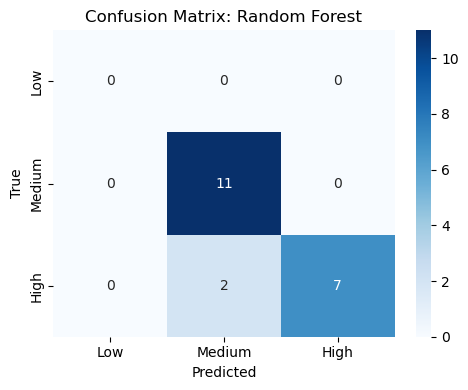


=== Decision Tree ===
Mean accuracy (5-fold CV): 1.00
Accuracy for each fold: [1. 1. 1. 1. 1.]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         9
      Medium       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



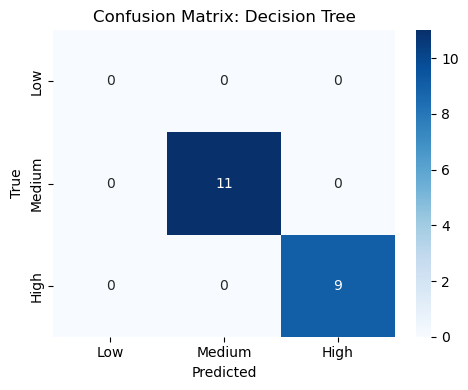


=== Gradient Boosting ===
Mean accuracy (5-fold CV): 1.00
Accuracy for each fold: [1. 1. 1. 1. 1.]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         9
      Medium       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



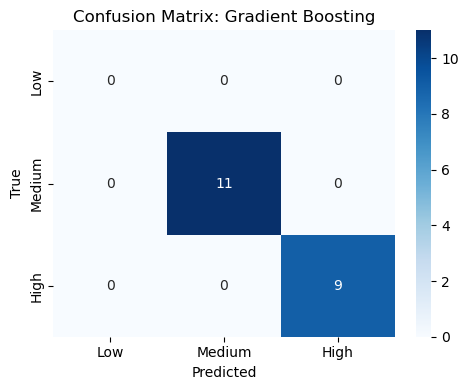


=== KNN ===
Mean accuracy (5-fold CV): 0.95
Accuracy for each fold: [1.   0.75 1.   1.   1.  ]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.89      0.94         9
      Medium       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



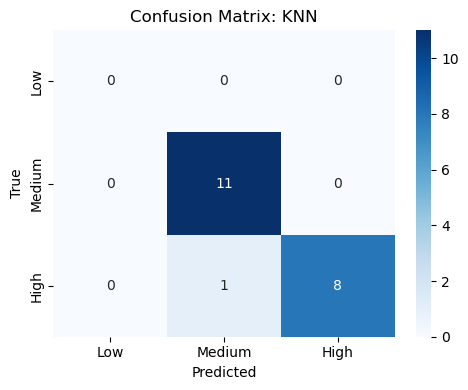


=== Logistic Regression ===
Mean accuracy (5-fold CV): 0.95
Accuracy for each fold: [1.   0.75 1.   1.   1.  ]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.89      0.94         9
      Medium       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



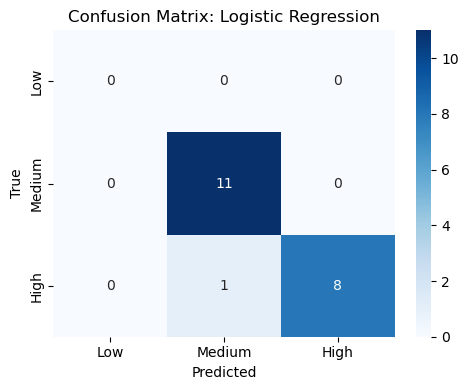


=== SVC ===
Mean accuracy (5-fold CV): 0.90
Accuracy for each fold: [1.  0.5 1.  1.  1. ]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.78      0.88         9
      Medium       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



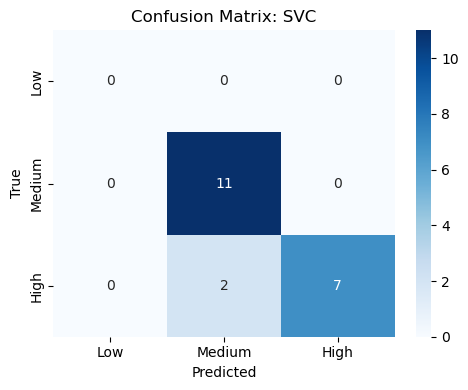

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Prepare data ===
X = risk_df[['Likelihood_Score', 'Impact_Score']]
y = risk_df['Severity_Label']

# === Define multiple models ===
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='rbf', C=1.0)
}

# === Loop through models ===
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Cross-validation accuracy
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Mean accuracy (5-fold CV): {scores.mean():.2f}")
    print("Accuracy for each fold:", scores)

    # Predictions & report
    y_pred_cv = cross_val_predict(model, X, y, cv=5)
    print("\nClassification Report:")
    print(classification_report(y, y_pred_cv))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred_cv, labels=['Low', 'Medium', 'High'])
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High'], 
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


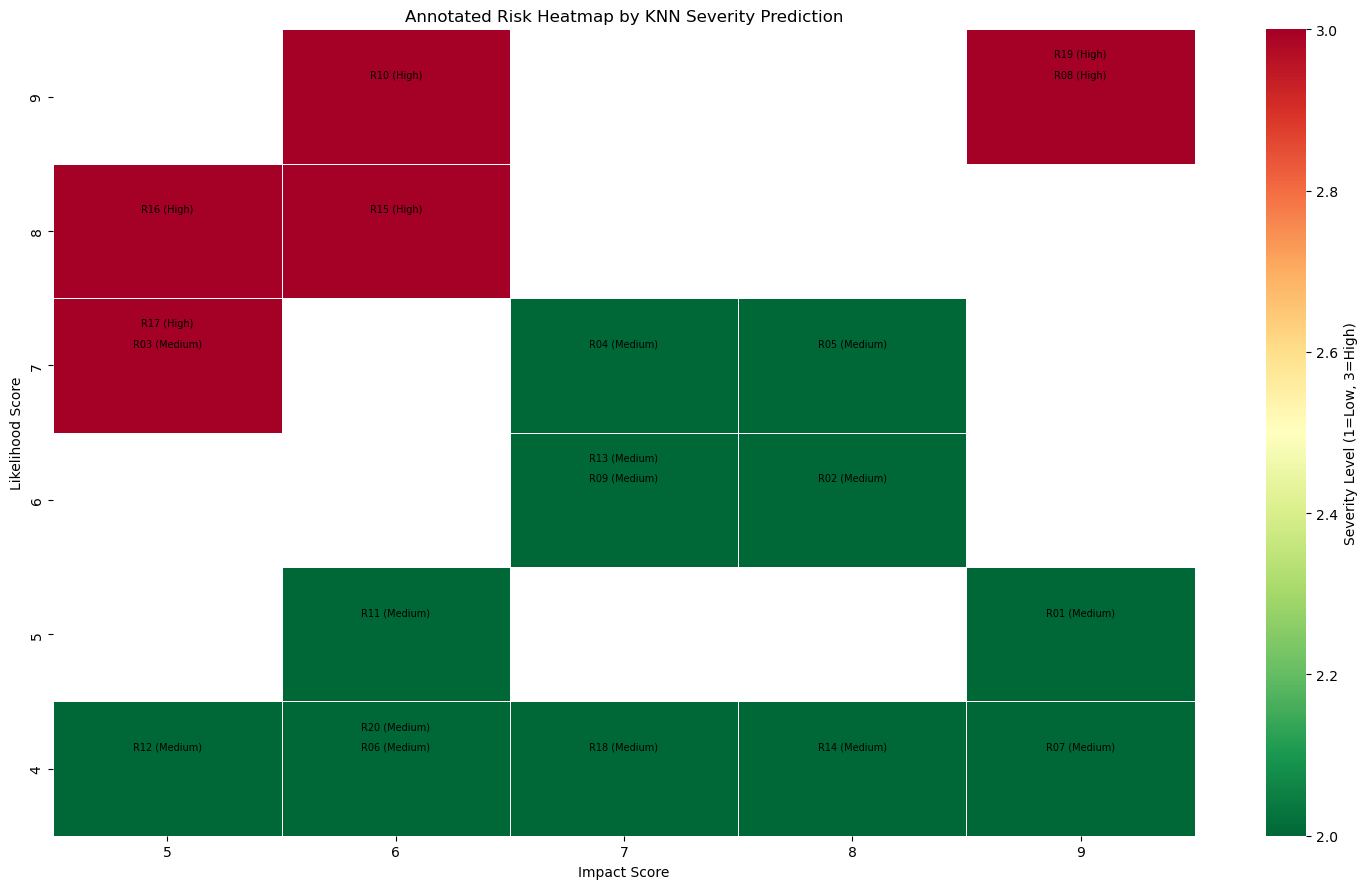

In [11]:
def classify_severity(row):
    if row['Likelihood_Score'] >= 7 and row['Impact_Score'] >= 6:
        return 'High'
    elif row['Likelihood_Score'] >= 5 or row['Impact_Score'] >= 5:
        return 'Medium'
    else:
        return 'Low'

risk_df['Severity_Label'] = risk_df.apply(classify_severity, axis=1)

# === KNN 模型訓練與預測 ===
X = risk_df[['Likelihood_Score', 'Impact_Score']]
y = risk_df['Severity_Label']

knn_model = KNeighborsClassifier(n_neighbors=3)
risk_df['Severity_Pred'] = cross_val_predict(knn_model, X, y, cv=5)

# === 建立 Heatmap ===
severity_levels = {'Low': 1, 'Medium': 2, 'High': 3}
risk_df['Severity_Num'] = risk_df['Severity_Pred'].map(severity_levels)
risk_df['Label'] = risk_df['Risk_ID'].astype(str) + ' (' + risk_df['Severity_Pred'] + ')'

pivot_severity = risk_df.groupby(['Likelihood_Score', 'Impact_Score'])['Severity_Num'].max().unstack()
label_matrix = risk_df.groupby(['Likelihood_Score', 'Impact_Score'])['Label'] \
                      .apply(lambda x: '\n'.join(x)).unstack(fill_value='')

pivot_severity = pivot_severity.sort_index(ascending=False)
label_matrix = label_matrix.sort_index(ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.heatmap(pivot_severity, cmap='RdYlGn_r', linewidths=0.5,
                 cbar_kws={'label': 'Severity Level (1=Low, 3=High)'})

for y in range(label_matrix.shape[0]):
    for x in range(label_matrix.shape[1]):
        text = label_matrix.iloc[y, x]
        if text:
            lines = text.split('\n')
            for i, line in enumerate(lines):
                ax.text(x + 0.5, y + 0.3 - 0.15 * i, line,
                        ha='center', va='top', fontsize=7, color='black')

plt.title("Annotated Risk Heatmap by KNN Severity Prediction")
plt.xlabel("Impact Score")
plt.ylabel("Likelihood Score")
plt.tight_layout()
plt.show()

# Quantitative Risk

In [5]:
risks= {
    'R21': {'optimistic': 3000, 'most_likely': 8000, 'pessimistic': 30000},
    'R14': {'optimistic': 5000, 'most_likely': 15000, 'pessimistic': 45000},
    'R6' : {'optimistic': 2000, 'most_likely': 7000, 'pessimistic': 20000},
    'R10': {'optimistic': 1000, 'most_likely': 5000, 'pessimistic': 18000}
}

In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Risks 
risks = {
    'R19': {'optimistic': 500000, 'most_likely': 1500000, 'pessimistic': 5000000},
    'R08': {'optimistic': 1000000, 'most_likely': 3000000, 'pessimistic': 6000000}
    
}

# normal distribution
def run_normal_simulation(risks, iteration=10000):
    simulations = []
    for risk_id, values in tqdm(risks.items(), desc="Simulating (Normal)"):
        o = np.random.normal(loc=values['optimistic'], scale=500, size=iteration)
        m = np.random.normal(loc=values['most_likely'], scale=500, size=iteration)
        p = np.random.normal(loc=values['pessimistic'], scale=500, size=iteration)

        cost = (o + 4 * m + p) / 6
        df = pd.DataFrame({'Cost': cost})
        df['Risk_ID'] = risk_id
        df['Method'] = 'Normal'
        simulations.append(df)
    return pd.concat(simulations, ignore_index=True)

# beta distriution 
def run_beta_simulation(risks, iteration=10000, a=2, b=4):
    simulations = []
    for risk_id, values in tqdm(risks.items(), desc="Simulating (Beta)"):
    
        o_beta = beta.rvs(a, b, size=iteration)
        m_beta = beta.rvs(a, b, size=iteration)
        p_beta = beta.rvs(a, b, size=iteration)

        o = values['optimistic'] + o_beta * (values['most_likely'] - values['optimistic'])
        m = values['most_likely'] + m_beta * (values['pessimistic'] - values['most_likely'])
        p = values['most_likely'] + p_beta * (values['pessimistic'] - values['most_likely'])

        cost = (o + 4 * m + p) / 6
        df = pd.DataFrame({'Cost': cost})
        df['Risk_ID'] = risk_id
        df['Method'] = 'Beta'
        simulations.append(df)
    return pd.concat(simulations, ignore_index=True)

# exe
df_normal = run_normal_simulation(risks)
df_beta = run_beta_simulation(risks)

# combine
combined_df = pd.concat([df_normal, df_beta], ignore_index=True)
summary = combined_df.groupby(['Risk_ID', 'Method'])['Cost'].describe().round(2)
print(summary)


Simulating (Beta): 100%|██████████| 2/2 [00:00<00:00, 613.25it/s]

                  count        mean        std         min         25%  \
Risk_ID Method                                                           
R08     Beta    10000.0  3610569.36  371091.11  2812076.52  3324865.53   
        Normal  10000.0  3166667.29     355.15  3165347.30  3166425.91   
R19     Beta    10000.0  2367508.18  432087.02  1404939.13  2031689.73   
        Normal  10000.0  1916665.53     354.92  1915255.57  1916422.37   

                       50%         75%         max  
Risk_ID Method                                      
R08     Beta    3570896.42  3864075.90  5024669.20  
        Normal  3166668.44  3166906.19  3167883.08  
R19     Beta    2328336.50  2660240.65  3833644.99  
        Normal  1916664.96  1916905.47  1918006.45  


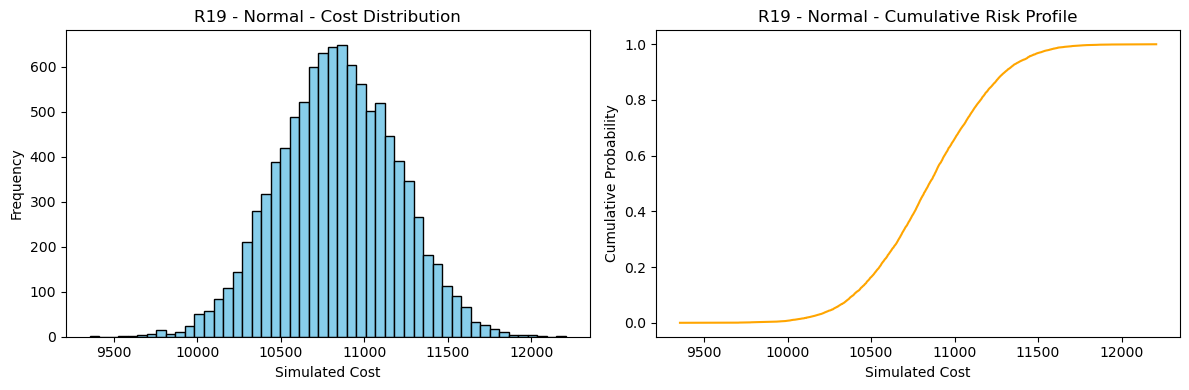

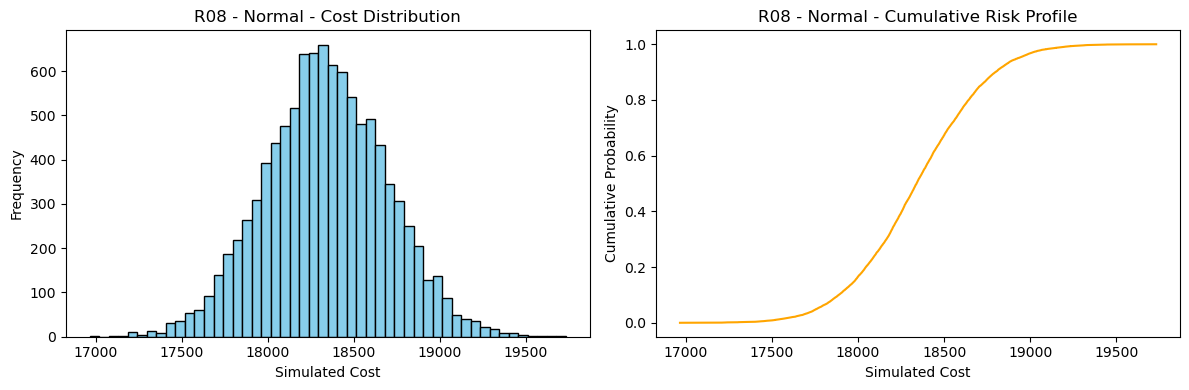

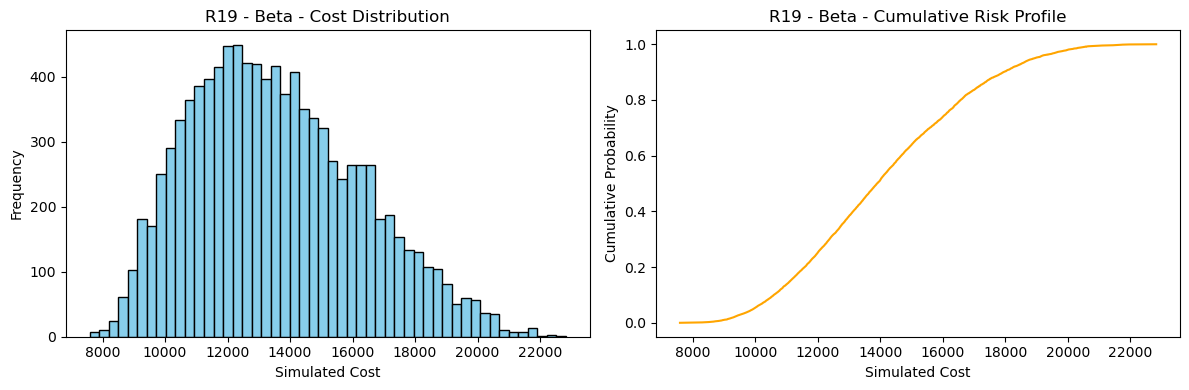

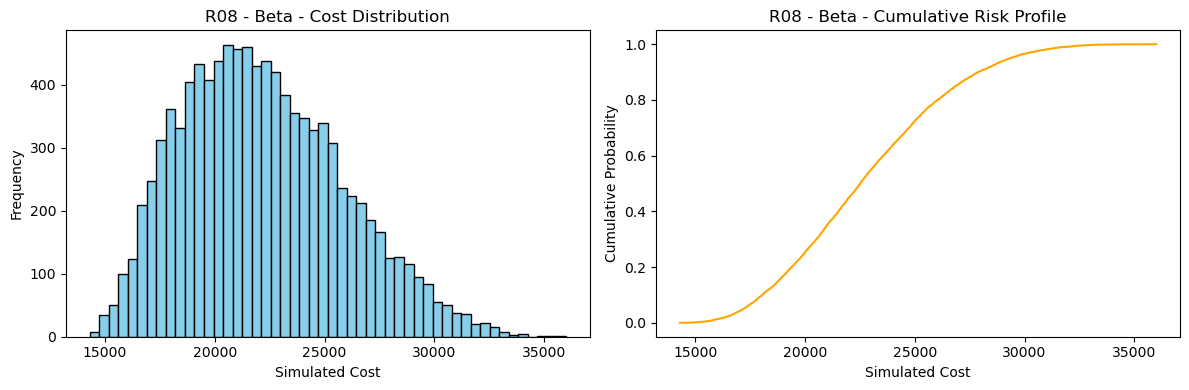

In [9]:
# Risk 
risk_methods = combined_df[['Risk_ID', 'Method']].drop_duplicates()

for _, row in risk_methods.iterrows():
    risk_id = row['Risk_ID']
    method = row['Method']
    
    df = combined_df[(combined_df['Risk_ID'] == risk_id) & (combined_df['Method'] == method)].copy()
    df = df.sort_values('Cost')
    df['cumulative'] = df['Cost'].cumsum() / df['Cost'].sum()
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # histogram
    ax[0].hist(df['Cost'], bins=50, color='skyblue', edgecolor='black')
    ax[0].set_title(f"{risk_id} - {method} - Cost Distribution")
    ax[0].set_xlabel("Simulated Cost")
    ax[0].set_ylabel("Frequency")
    
    # CDF Cumulative Distribution Function
    ax[1].plot(df['Cost'], df['cumulative'], color='orange')
    ax[1].set_title(f"{risk_id} - {method} - Cumulative Risk Profile")
    ax[1].set_xlabel("Simulated Cost")
    ax[1].set_ylabel("Cumulative Probability")
    
    plt.tight_layout()
    plt.show()
